In [48]:
#import the holy trinity
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#bring in the datasets for adopter (has solar), considerer(thought about buying), and gps(have not thought of 
#buying yet) 
#project goal: can you predict who will buy solar based on those who have already purchased?

considerer = pd.read_csv('C:/Users/Matt/Desktop/datasets/CONSIDERER.csv')

In [3]:
considerer.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,HAVESOLAR,CONSIDEREDSOLAR,CONSIDER_SERIOUSLY,CONSIDER_ACTN1,CONSIDER_ACTN2,...,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,RETIRED_LAST5YRS,RETIRE_WHEN,RETIRE_WHEN_BINNED
0,2946,2,4,2,NaN,2,1,3,1,0,...,1,1,1.0,3,3,4,0,NaN,1.0,6.0
1,2947,2,4,3,NaN,2,1,2,1,1,...,1,0,2.0,2,1,4,0,NaN,1.0,5.0
2,2948,2,4,4,NaN,2,1,3,1,0,...,0,1,4.0,4,1,3,0,NaN,2.0,NaN
3,2949,2,4,4,NaN,2,1,3,1,1,...,0,0,3.0,1,2,4,1,0.0,NaN,NaN
4,2950,2,4,2,NaN,2,1,2,0,0,...,0,0,4.0,3,1,2,1,0.0,NaN,NaN


In [4]:
considerer.shape

(588, 201)

In [5]:
adopter= pd.read_csv('C:/Users/Matt/Desktop/datasets/ADOPTER.csv')

In [6]:
adopter.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,HAVESOLAR,PROMPT1,PROMPT2,PROMPT3,PROMPT4,...,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,RETIRED_LAST5YRS,RETIRE_WHEN,RETIRE_WHEN_BINNED
0,1342,3,2,4,NaN,1,0,0,1,0,...,0.0,0.0,4.0,4.0,2,5.0,1,1.0,NaN,NaN
1,1343,3,2,4,NaN,1,1,0,1,0,...,0.0,0.0,4.0,2.0,1,4.0,0,NaN,98.0,NaN
2,1344,3,2,4,NaN,1,0,0,0,0,...,99.0,99.0,NaN,99.0,99,99.0,99,NaN,NaN,NaN
3,1345,3,2,4,NaN,1,0,0,1,0,...,1.0,0.0,2.0,2.0,2,3.0,0,NaN,98.0,NaN
4,1346,3,2,4,NaN,1,0,0,1,0,...,0.0,1.0,2.0,2.0,2,1.0,0,NaN,98.0,NaN


In [7]:
adopter.shape

(1604, 255)

In [8]:
gps= pd.read_csv('C:/Users/Matt/Desktop/datasets/GPS.csv')

In [9]:
gps.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,HOME,STATE,AGE_BINNED,EDUC_BINNED,F1,F2,TRIG1,...,SQFT_BINNED,GENDER,PEOPLE_TOT_3PLUS,HAVE_KIDS,EMPLOY_1,EMPLOY_2,EMPLOY_5,RETIRED,FINANCIAL,INCOME_BINNED
0,1,1,1,1,1,4.0,4,1,0,0,...,3,0,0.0,0,0,0,0,1,2,3
1,2,1,1,1,4,3.0,4,1,1,0,...,3,1,0.0,0,1,0,0,0,2,4
2,3,1,1,1,2,4.0,1,1,1,0,...,4,0,0.0,0,0,0,0,1,1,95
3,4,1,1,1,4,4.0,2,0,1,1,...,2,0,0.0,0,0,0,0,1,1,4
4,5,1,1,1,4,4.0,1,0,1,1,...,3,0,0.0,0,0,0,0,1,2,3


In [10]:
gps.shape

(1341, 123)

In [11]:
#find out how many columns are in all datasets (adopter, considerer and gps), so as to compare across all three datasets:
c_index = considerer.columns
a_index = adopter.columns
a_c_cols = c_index.intersection(a_index)

In [12]:
a_c_cols

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'HAVESOLAR', 'PROMPT1', 'PROMPT2', 'PROMPT3', 'PROMPT4',
       ...
       'HAVE_KIDS', 'GENDER', 'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL',
       'INCOME_BINNED', 'RETIRED', 'RETIRED_LAST5YRS', 'RETIRE_WHEN',
       'RETIRE_WHEN_BINNED'],
      dtype='object', length=142)

In [13]:
#do the same for adopters (will need features in all three datasets to be able to compare)
g_index = gps.columns
a_c_g_cols = a_c_cols.intersection(g_index)

In [14]:
a_c_g_cols

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype='object')

In [15]:
#looks to be consistant across all three datasets, so now we can remove the others, and focus
#on reducing the above list of features to only those that have enough data and are important

In [16]:
a_c_g_cols.value_counts().sum() #how many features are in all three datasets

49

In [17]:
#create new datasets with dropped columns, so only comparable columns exist
a_comparable = adopter[a_c_g_cols] #should now contain only relatable columns, repeat for c and c datasets
c_comparable = considerer[a_c_g_cols]
g_comparable = gps[a_c_g_cols]

a_c_g_cols_ar = np.array(a_c_g_cols)
a_c_g_cols_ar #may not need this, but found it difficult to work with an index object...

array(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3',
       'E2', 'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1',
       'VB2', 'VB3', 'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1',
       'VE2', 'VE4', 'VO1', 'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3',
       'CNS1', 'CNS2', 'CNS4', 'SQFT_BINNED', 'STANCE',
       'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER', 'AGE_BINNED',
       'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype=object)

In [18]:
#calculate the percent of missing data:
a_comp_nulls = a_comparable.isnull().sum()/len(a_comparable)*100
a_comp_nulls = a_comp_nulls[a_comp_nulls !=0] #remove the features that are not missing data
print("Percent missing data:")
print(a_comp_nulls)

Percent missing data:
HOME                  95.324190
WINTER_NOPV_BINNED     8.291771
SUMMER_NOPV_BINNED     9.102244
SQFT_BINNED           11.221945
PEOPLE_TOT_3PLUS       8.728180
HAVE_KIDS              0.187032
GENDER                 0.561097
AGE_BINNED             7.356608
EDUC_BINNED            9.289277
INCOME_BINNED          3.366584
dtype: float64


In [19]:
#Adopters missing some key data:
#'Home'-remove since so much is missing
#'Winter/Summer bills w/o PV'-may be able to fill with median???
#'SQFT'-fill with median?
#'People-total >=3'-not sure what to do...
#'Have Kids/Gender'-very low, see how many records (does not show missing in other datasets)
#'age'-shows up in other datasets too, need to determine what to do with this, seems important?
#'education'-seems important to target, not showing in other datasets
#'income'-same as education

In [20]:
#calculate the percent of missing data:
c_comp_nulls = c_comparable.isnull().sum()/len(c_comparable)*100
c_comp_nulls = c_comp_nulls[c_comp_nulls !=0]
print("Percent missing data:")
print(c_comp_nulls)

Percent missing data:
HOME                  25.850340
WINTER_NOPV_BINNED     2.551020
SUMMER_NOPV_BINNED     2.210884
PN2                    0.170068
E2                     0.170068
BB2                    0.170068
BE10                   0.170068
VT1                    0.170068
SQFT_BINNED            8.843537
PEOPLE_TOT_3PLUS       2.380952
AGE_BINNED             1.700680
dtype: float64


In [21]:
#the features with 0.170068 are probably all from same record(s). Find out how many null records:
c_comparable[c_comparable['PN2'].isnull()]

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
347,3293,2,5,2,1.0,2.0,1.0,1,NaN,1,...,NaN,1,NaN,99,1,2.0,4,4,1,0


In [22]:
#delete this one record and all of those nulls will be removed!

In [23]:
#calculate the percent of missing data:
g_comp_nulls = g_comparable.isnull().sum()/len(g_comparable)*100
g_comp_nulls = g_comp_nulls[g_comp_nulls !=0]
print("Percent missing data:")
print(g_comp_nulls)

Percent missing data:
WINTER_NOPV_BINNED    8.277405
SUMMER_NOPV_BINNED    8.426547
PEOPLE_TOT_3PLUS      1.789709
AGE_BINNED            0.149142
dtype: float64


In [24]:
#Taking a look at some data that may be a predictor of someone purchasing-Income:
a_count = a_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
a_count

INCOME_BINNED
1.0     132
2.0     224
3.0     208
4.0     359
5.0     289
95.0    266
99.0     72
Name: INCOME_BINNED, dtype: int64

In [25]:
a_counts = a_count.apply(lambda x: 100 * x/a_count.sum())
a_counts.rename('Adopter', inplace=True)
a_counts

INCOME_BINNED
1.0      8.516129
2.0     14.451613
3.0     13.419355
4.0     23.161290
5.0     18.645161
95.0    17.161290
99.0     4.645161
Name: Adopter, dtype: float64

In [26]:
c_count = c_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
#c_count

In [27]:
c_counts = c_count.apply(lambda x: 100 * x/c_count.sum())
c_counts.rename('Considerer', inplace=True)
c_counts

INCOME_BINNED
1     17.687075
2     17.687075
3     20.578231
4     20.408163
5     15.136054
95     6.802721
99     1.700680
Name: Considerer, dtype: float64

In [28]:
#seeing more upper income on adopters than in considerer group.

In [29]:
g_count = g_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
g_counts = g_count.apply(lambda x: 100 * x/g_count.sum())
g_counts.rename('GPS', inplace=True)
g_counts

INCOME_BINNED
1     17.225951
2     18.568233
3     18.642804
4     18.568233
5     11.185682
95    15.734526
99     0.074571
Name: GPS, dtype: float64

In [30]:
plt.rcParams['figure.figsize'] = (16,5)

Adopter       AxesSubplot(0.125,0.125;0.775x0.755)
Considerer    AxesSubplot(0.125,0.125;0.775x0.755)
GPS           AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

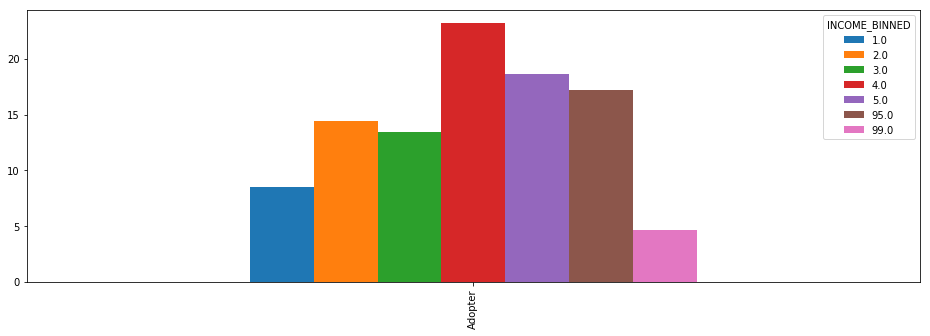

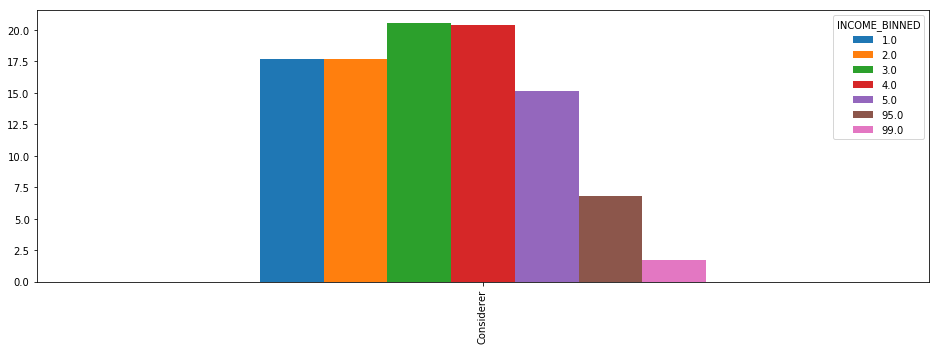

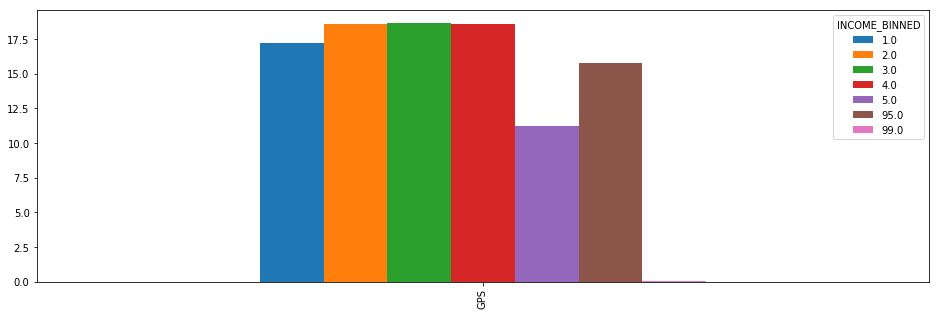

In [31]:
#and even more so in the gps (not considering) group.
all_income = pd.DataFrame()
#all_income.pivot(index=[a_count.name, c_count.name, g_count.name], columns=a_count.index, values=[a_count.values, c_count.values, g_count.values])
all_income.append([a_counts, c_counts, g_counts]).groupby(level=0).plot(kind='bar')

In [32]:
#make all dataset's features categorical
g_comparable_cat = g_comparable[g_comparable.columns].astype('category')
g_comparable_cat.set_index('CASE_ID')
g_comparable['CASE_ID'].rename('ID') #not channging the column name?
g_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,1341,1341,1341,1341,1341,1230.0,1228.0,1341,1341,1341,...,1341,1341,1317.0,1341,1341,1339.0,1341,1341,1341,1341
unique,1341,1,1,4,2,11.0,11.0,6,6,6,...,4,8,2.0,3,3,4.0,4,5,7,2
top,1341,1,1,3,1,5.0,5.0,4,4,4,...,2,3,0.0,0,1,4.0,2,1,3,0
freq,1,1341,1341,351,1246,297.0,254.0,504,555,673,...,423,437,853.0,1034,795,376.0,456,614,250,857


In [33]:
#adding in a target column, and populating the adopters with '1' (rest are left empty)
g_comparable_cat['Purchased'] = ''
g_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1,1,1,1,1,6.0,4.0,3,3,3,...,2,0.0,0,0,4.0,4,2,3,1,
1,2,1,1,4,1,7.0,8.0,5,5,3,...,2,0.0,0,1,3.0,4,2,4,0,
2,3,1,1,2,1,5.0,5.0,3,3,4,...,4,0.0,0,0,4.0,1,1,95,1,
3,4,1,1,4,1,3.0,2.0,3,3,3,...,4,0.0,0,0,4.0,2,1,4,1,
4,5,1,1,4,1,4.0,3.0,4,4,4,...,97,0.0,0,0,4.0,1,2,3,1,


In [34]:
g_comparable_cat.describe().T

,count,unique,top,freq
CASE_ID,1341,1341,1341,1
GPS_NAC_ADOPTER,1341,1,1,1341
SURVEY_SOURCE,1341,1,1,1341
STATE,1341,4,3,351
HOME,1341,2,1,1246
WINTER_NOPV_BINNED,1230,11,5,297
SUMMER_NOPV_BINNED,1228,11,5,254
PN1,1341,6,4,504
PN2,1341,6,4,555
PN3,1341,6,4,673


In [35]:
a_comparable_cat = a_comparable[g_comparable.columns].astype('category')
a_comparable_cat.set_index('CASE_ID')
a_comparable['CASE_ID'].rename('ID')
a_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,1604,1604,1604,1604,75.0,1471.0,1458.0,1604,1604,1604,...,1424.0,1604,1464.0,1601.0,1595.0,1486.0,1455.0,1604,1550.0,1604
unique,1604,1,2,4,2.0,11.0,11.0,7,7,7,...,4.0,8,2.0,3.0,3.0,4.0,5.0,5,7.0,3
top,2945,3,2,4,1.0,5.0,11.0,5,5,4,...,2.0,3,0.0,0.0,0.0,4.0,2.0,1,4.0,0
freq,1,1604,1529,1176,74.0,312.0,285.0,543,505,657,...,537.0,494,746.0,1027.0,1009.0,464.0,502.0,835,359.0,996


In [36]:
#adding in a target column, and populating the adopters with '1' (rest are left empty)
a_comparable_cat['Purchased'] = 1
a_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1342,3,2,4,NaN,4.0,9.0,4,4,4,...,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1,1
1,1343,3,2,4,NaN,7.0,11.0,4,4,5,...,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0,1
2,1344,3,2,4,NaN,NaN,NaN,4,4,3,...,90,NaN,99.0,99.0,NaN,99.0,99,99.0,99,1
3,1345,3,2,4,NaN,11.0,11.0,1,1,1,...,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0,1
4,1346,3,2,4,NaN,5.0,7.0,5,3,4,...,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0,1


In [37]:
c_comparable_cat = c_comparable[c_comparable.columns].astype('category')
c_comparable_cat.set_index('CASE_ID')
c_comparable['CASE_ID'].rename('ID')
c_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,588,588,588,588,436.0,573.0,575.0,588,587.0,588,...,536.0,588,574.0,588,588,578.0,588,588,588,588
unique,588,1,2,4,2.0,11.0,11.0,6,6.0,6,...,4.0,8,2.0,3,3,4.0,4,5,7,3
top,3533,2,5,4,1.0,5.0,5.0,4,4.0,4,...,1.0,3,1.0,0,0,1.0,4,1,3,0
freq,1,588,436,187,410.0,145.0,96.0,200,200.0,233,...,172.0,183,321.0,317,323,272.0,178,284,121,468


In [38]:
#adding in a target column, and populating the adopters with '1' (rest are left empty)
c_comparable_cat['Purchased'] = ''
c_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,2946,2,4,2,NaN,5.0,6.0,3,3.0,2,...,97,1.0,1,1,1.0,3,3,4,0,
1,2947,2,4,3,NaN,6.0,11.0,3,3.0,3,...,4,1.0,1,0,2.0,2,1,4,0,
2,2948,2,4,4,NaN,6.0,7.0,5,5.0,3,...,1,1.0,0,1,4.0,4,1,3,0,
3,2949,2,4,4,NaN,5.0,5.0,2,2.0,2,...,3,1.0,0,0,3.0,1,2,4,1,
4,2950,2,4,2,NaN,9.0,5.0,4,4.0,3,...,4,0.0,0,0,4.0,3,1,2,1,


In [39]:
#Combine all datasets together
combined = pd.concat([a_comparable, c_comparable, g_comparable], sort=False)

In [40]:
combined.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
0,1342,3,2,4,NaN,4.0,9.0,4,4.0,4,...,1.0,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1
1,1343,3,2,4,NaN,7.0,11.0,4,4.0,5,...,2.0,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0
2,1344,3,2,4,NaN,NaN,NaN,4,4.0,3,...,4.0,90,NaN,99.0,99.0,NaN,99.0,99,99.0,99
3,1345,3,2,4,NaN,11.0,11.0,1,1.0,1,...,NaN,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0
4,1346,3,2,4,NaN,5.0,7.0,5,3.0,4,...,4.0,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0


In [41]:
combined_cat = a_comparable[g_comparable.columns].astype('category')
combined_cat.set_index('CASE_ID')
combined_cat['CASE_ID'].rename('ID')
combined_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,1604,1604,1604,1604,75.0,1471.0,1458.0,1604,1604,1604,...,1424.0,1604,1464.0,1601.0,1595.0,1486.0,1455.0,1604,1550.0,1604
unique,1604,1,2,4,2.0,11.0,11.0,7,7,7,...,4.0,8,2.0,3.0,3.0,4.0,5.0,5,7.0,3
top,2945,3,2,4,1.0,5.0,11.0,5,5,4,...,2.0,3,0.0,0.0,0.0,4.0,2.0,1,4.0,0
freq,1,1604,1529,1176,74.0,312.0,285.0,543,505,657,...,537.0,494,746.0,1027.0,1009.0,464.0,502.0,835,359.0,996


In [42]:
g_comparable_cat.describe().T

,count,unique,top,freq
CASE_ID,1341,1341,1341,1
GPS_NAC_ADOPTER,1341,1,1,1341
SURVEY_SOURCE,1341,1,1,1341
STATE,1341,4,3,351
HOME,1341,2,1,1246
WINTER_NOPV_BINNED,1230,11,5,297
SUMMER_NOPV_BINNED,1228,11,5,254
PN1,1341,6,4,504
PN2,1341,6,4,555
PN3,1341,6,4,673


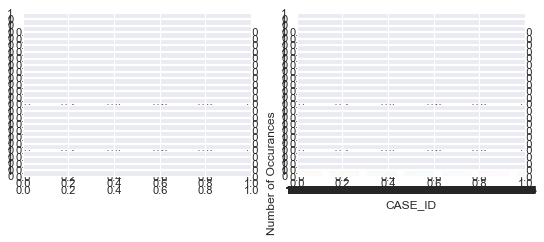

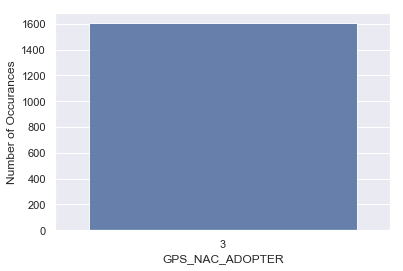

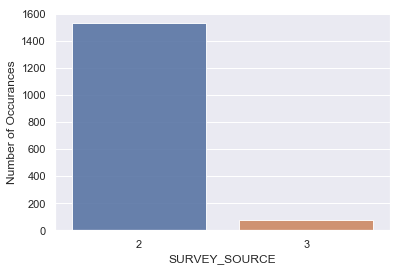

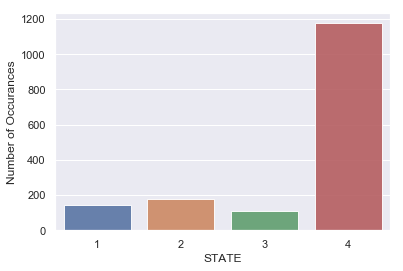

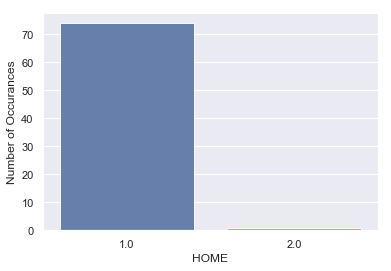

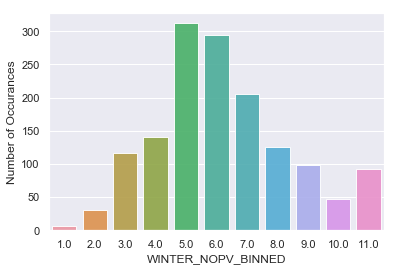

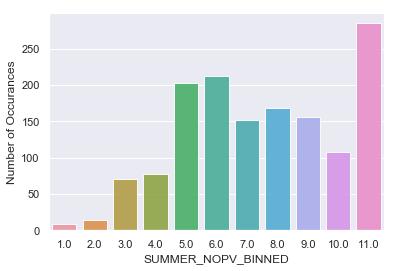

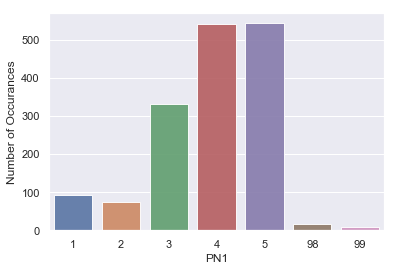

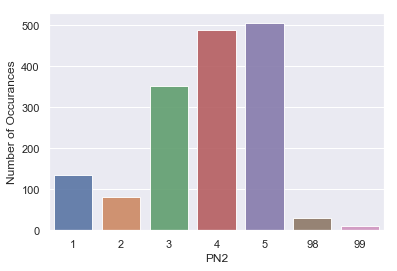

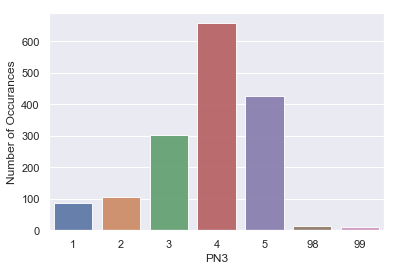

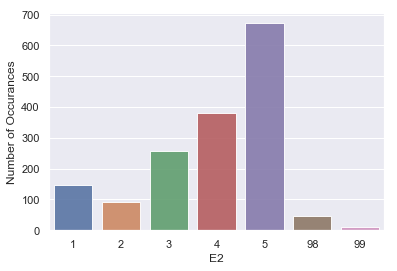

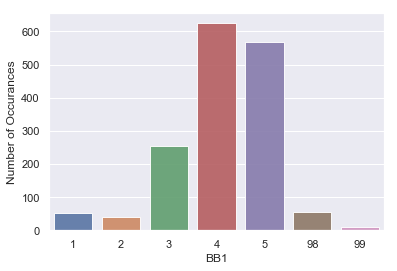

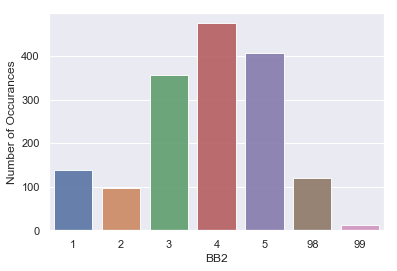

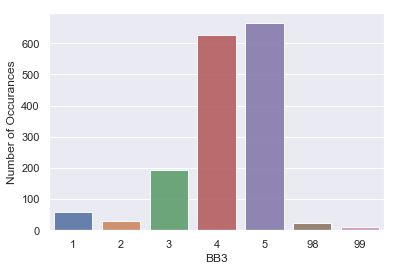

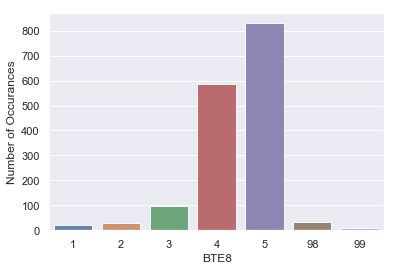

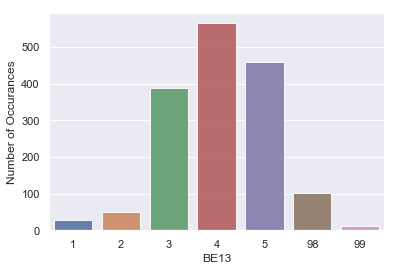

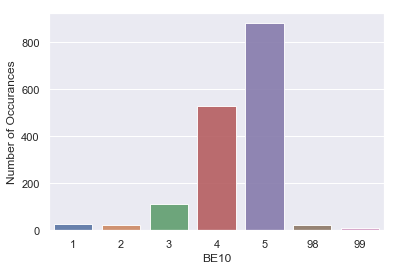

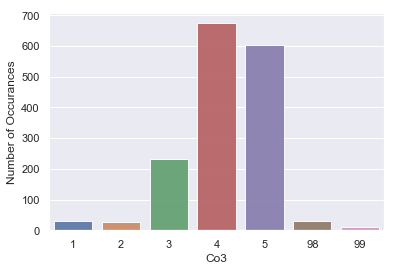

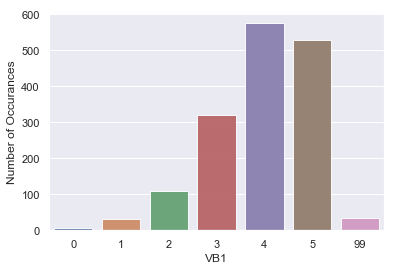

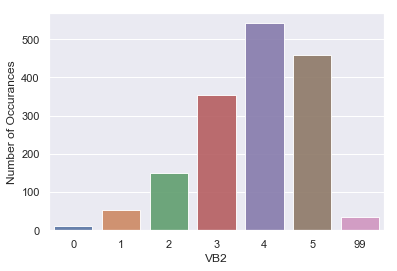

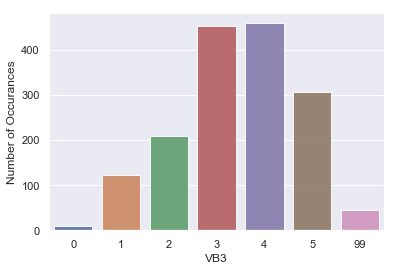

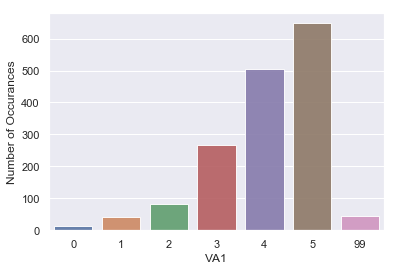

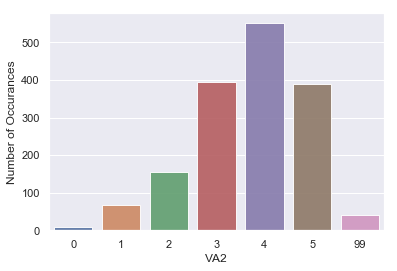

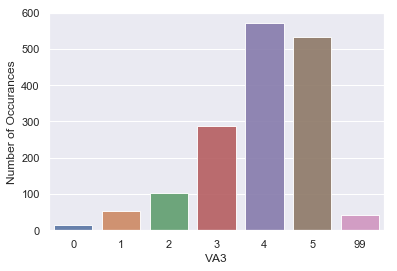

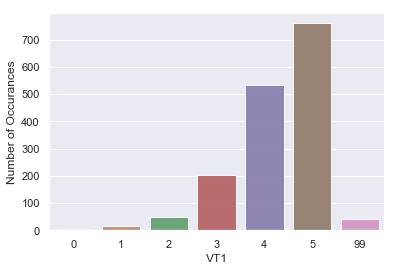

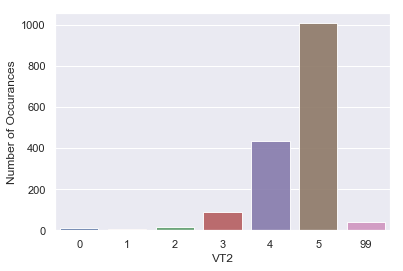

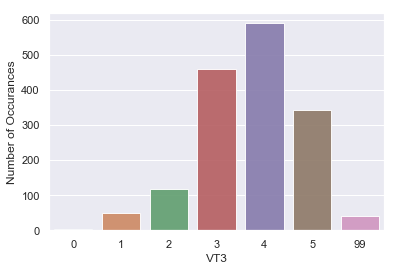

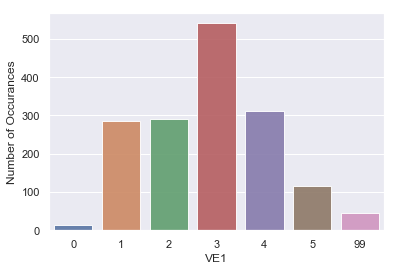

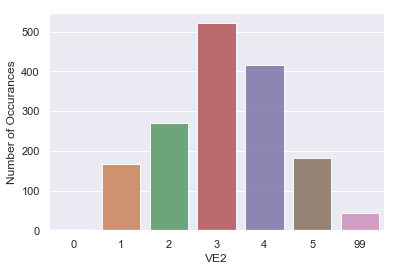

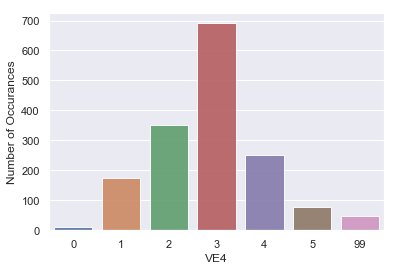

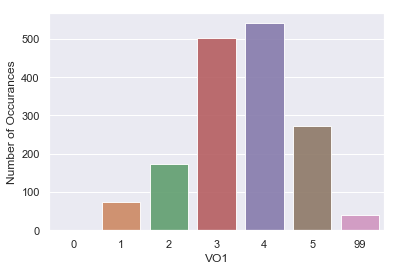

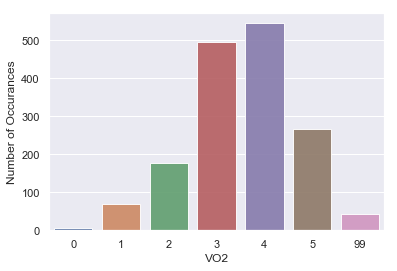

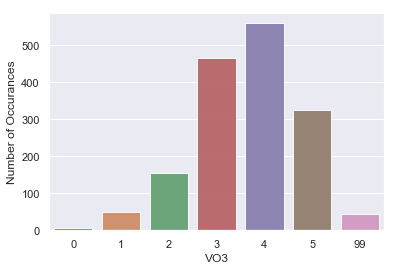

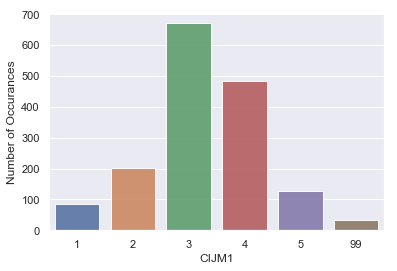

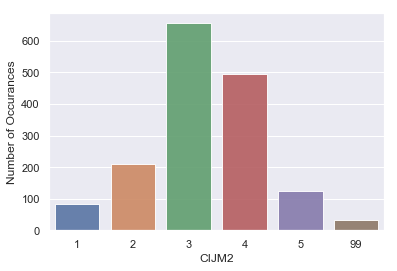

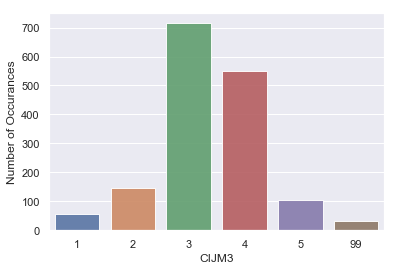

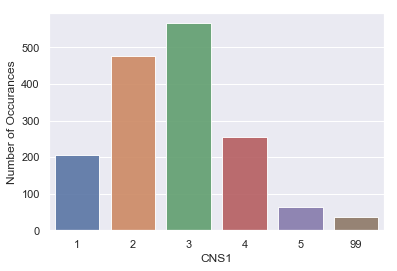

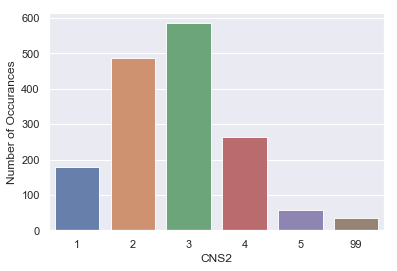

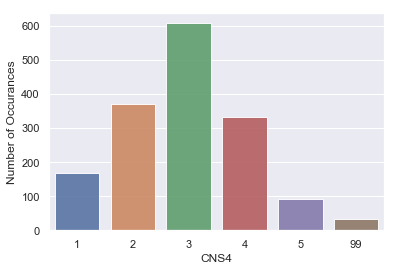

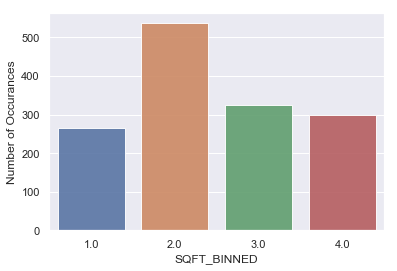

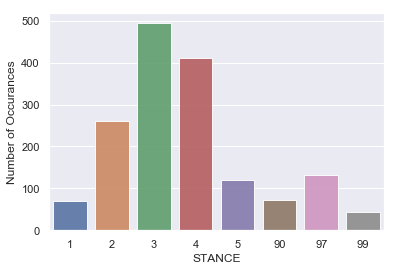

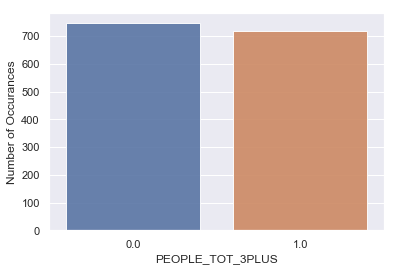

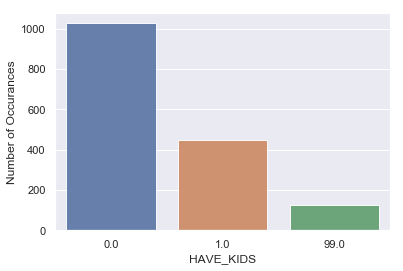

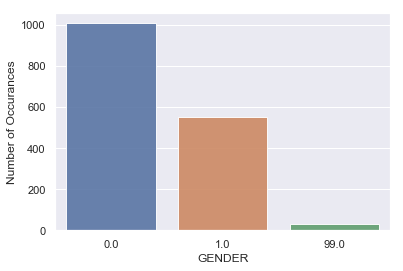

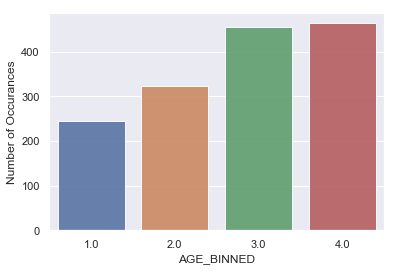

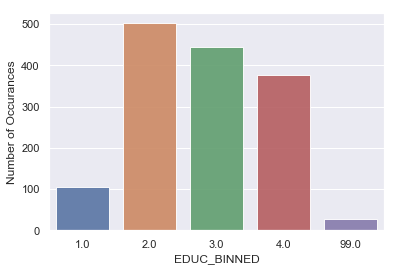

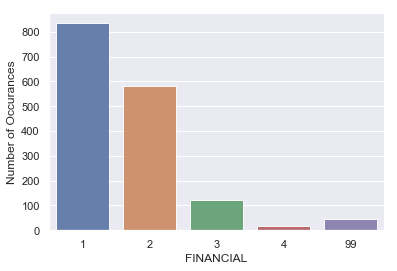

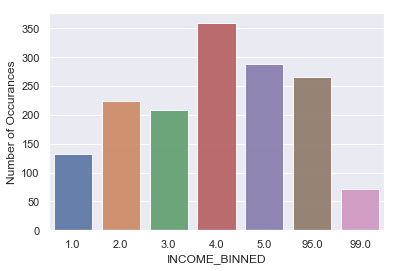

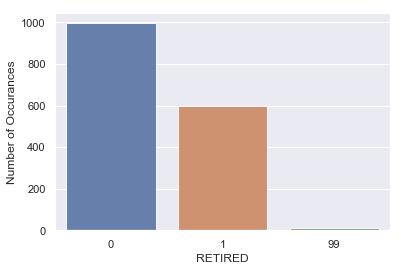

In [55]:
names = [combined_cat.columns]
fig, axs = plt.subplots(25,2, figsize=(9,3))
for i in combined_cat.columns:
    sns.set(style='darkgrid')
    sns.barplot(combined_cat[i].value_counts().index, combined_cat[i].value_counts().values, alpha=0.9) 
    plt.ylabel('Number of Occurances')
    plt.xlabel(i)
    plt.show()